# Imports

In [1]:
import os
import datetime
from ast import literal_eval

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm

import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Params

In [2]:
datadir = 'G:\\IntEr-HRI\\Results'

# Cross-validation

## Loading

In [3]:
fname = 'validation_32_230623_realwindow_training data_test.csv'

df = pd.read_csv(f'{datadir}\\{fname}')
df['condition'] = df['epoch_in'] + '_' + df['epoch_out']

col_list = ['test_idxs', 'selected_idxs 0', 'selected_idxs 1', 'selected_first_idxs 0', 'selected_first_idxs 1', 'selected_last_idxs 0', 'selected_last_idxs 1']
for col in col_list:
    df[col] = df[col].apply(literal_eval)
    
col_list = ['truth_idxs 0', 'truth_idxs 1']
for col in col_list:
    df[col] = df[col].apply(lambda x : [int(elem) for elem in x[2:-1].split(' ') if elem !=''])

In [4]:
df.head()

,Unnamed: 0,w_length,w_step,w_train_n,w_test_n,epoch_in,epoch_out,preprocessing_modality,undersample,Balanced accuracy,...,selected_last_idxs 0,selected_idxs 0,truth_idxs 0,selected_first_idxs 1,selected_last_idxs 1,selected_idxs 1,truth_idxs 1,subject,trial,condition
0,0,250,50,360,4962,realwindow,realwindow,preprocessed,True,0.839361,...,"[75039, 77571, 92119, 108682, 112384, 119289]","[39264, 50486, 65522, 77571, 92119, 119289]","[39072, 50180, 64203, 74820, 91858, 111908]","[37961, 44635, 47872, 61595, 74978, 77790]","[61595, 74978, 77790, 87605, 102741, 110835]","[37961, 47872, 61595, 77790, 87605, 110835]","[37648, 47621, 61365, 77525, 87390, 110540]",BY74D,0,realwindow_realwindow
1,1,250,50,360,4962,realwindow,realwindow,preprocessed,True,0.850306,...,"[41887, 49433, 54486, 79944, 81920, 93450]","[13899, 41887, 49433, 54486, 81920, 93450]","[24697, 37843, 50895, 73262, 89628, 102791]","[33965, 39143, 50378, 76578, 81857, 86499]","[39143, 50378, 76578, 81857, 86499, 91662]","[33965, 39143, 50378, 76578, 86499, 91662]","[38934, 58335, 81553, 91340, 101632, 111572]",BY74D,0,realwindow_realwindow
2,2,250,50,360,4962,realwindow,realwindow,preprocessed,True,0.868452,...,"[89842, 93450, 99794, 103099, 106358, 117746]","[10832, 24998, 38191, 51107, 93450, 117746]","[24697, 37843, 50895, 73262, 89628, 102791]","[34323, 44607, 54805, 75000, 87974, 89054]","[75000, 87974, 89054, 94335, 108298, 112441]","[34323, 44607, 54805, 75000, 94335, 112441]","[34102, 44439, 54580, 74774, 87795, 107939]",BY74D,0,realwindow_realwindow
3,3,250,50,360,4962,realwindow,realwindow,preprocessed,True,0.888382,...,"[76577, 81857, 86289, 91662, 98995, 102449]","[43172, 60722, 76577, 86289, 91662, 102449]","[38934, 58335, 81553, 91340, 101632, 111572]","[37961, 61595, 74978, 77790, 87605, 90564]","[61595, 74978, 77790, 87605, 90564, 110731]","[37961, 61595, 77790, 87605, 90564, 110731]","[37648, 47621, 61365, 77525, 87390, 110540]",BY74D,0,realwindow_realwindow
4,4,250,50,360,4962,realwindow,realwindow,preprocessed,True,0.828652,...,"[54805, 75000, 87974, 102903, 108298, 118669]","[34323, 54805, 75000, 87974, 108298, 118669]","[34102, 44439, 54580, 74774, 87795, 107939]","[39221, 50486, 65522, 73283, 75039, 77571]","[50486, 65522, 73283, 75039, 77571, 119289]","[39221, 50486, 65522, 75039, 77571, 119289]","[39072, 50180, 64203, 74820, 91858, 111908]",BY74D,0,realwindow_realwindow


## Confusion Table

In [5]:
confusion_df = df.groupby(by=['subject'])[['Balanced accuracy', 'tn', 'fp', 'fn', 'tp']].mean()
confusion_df['tpr'] = (confusion_df['tp']/(confusion_df['tp'] + confusion_df['fn'])).round(2)
confusion_df['tnr'] = (confusion_df['tn']/(confusion_df['tn'] + confusion_df['fp'])).round(2)
confusion_df['bacc'] = ((confusion_df['tpr'] + confusion_df['tnr'])/2).round(2)

display(confusion_df)
mean_df = df[['Balanced accuracy', 'tn', 'fp', 'fn', 'tp']].median()


,Balanced accuracy,tn,fp,fn,tp,tpr,tnr,bacc
subject,,,,,,,,
AA56D,0.814277,5178.49,470.51,16.97,42.03,0.71,0.92,0.82
AC17D,0.918626,4813.86,228.14,7.05,52.95,0.88,0.95,0.92
AJ05D,0.805317,4951.47,594.53,16.93,43.07,0.72,0.89,0.80
AQ59D,0.849320,4814.09,269.41,14.55,43.95,0.75,0.95,0.85
AW59D,0.929921,4549.84,164.16,6.32,53.68,0.89,0.97,0.93
AY63D,0.816858,4883.39,486.61,16.54,43.46,0.72,0.91,0.82
BS34D,0.878301,4478.15,553.85,8.00,52.00,0.87,0.89,0.88
BY74D,0.858647,4467.98,434.02,11.65,48.35,0.81,0.91,0.86


## Confusion Matrices

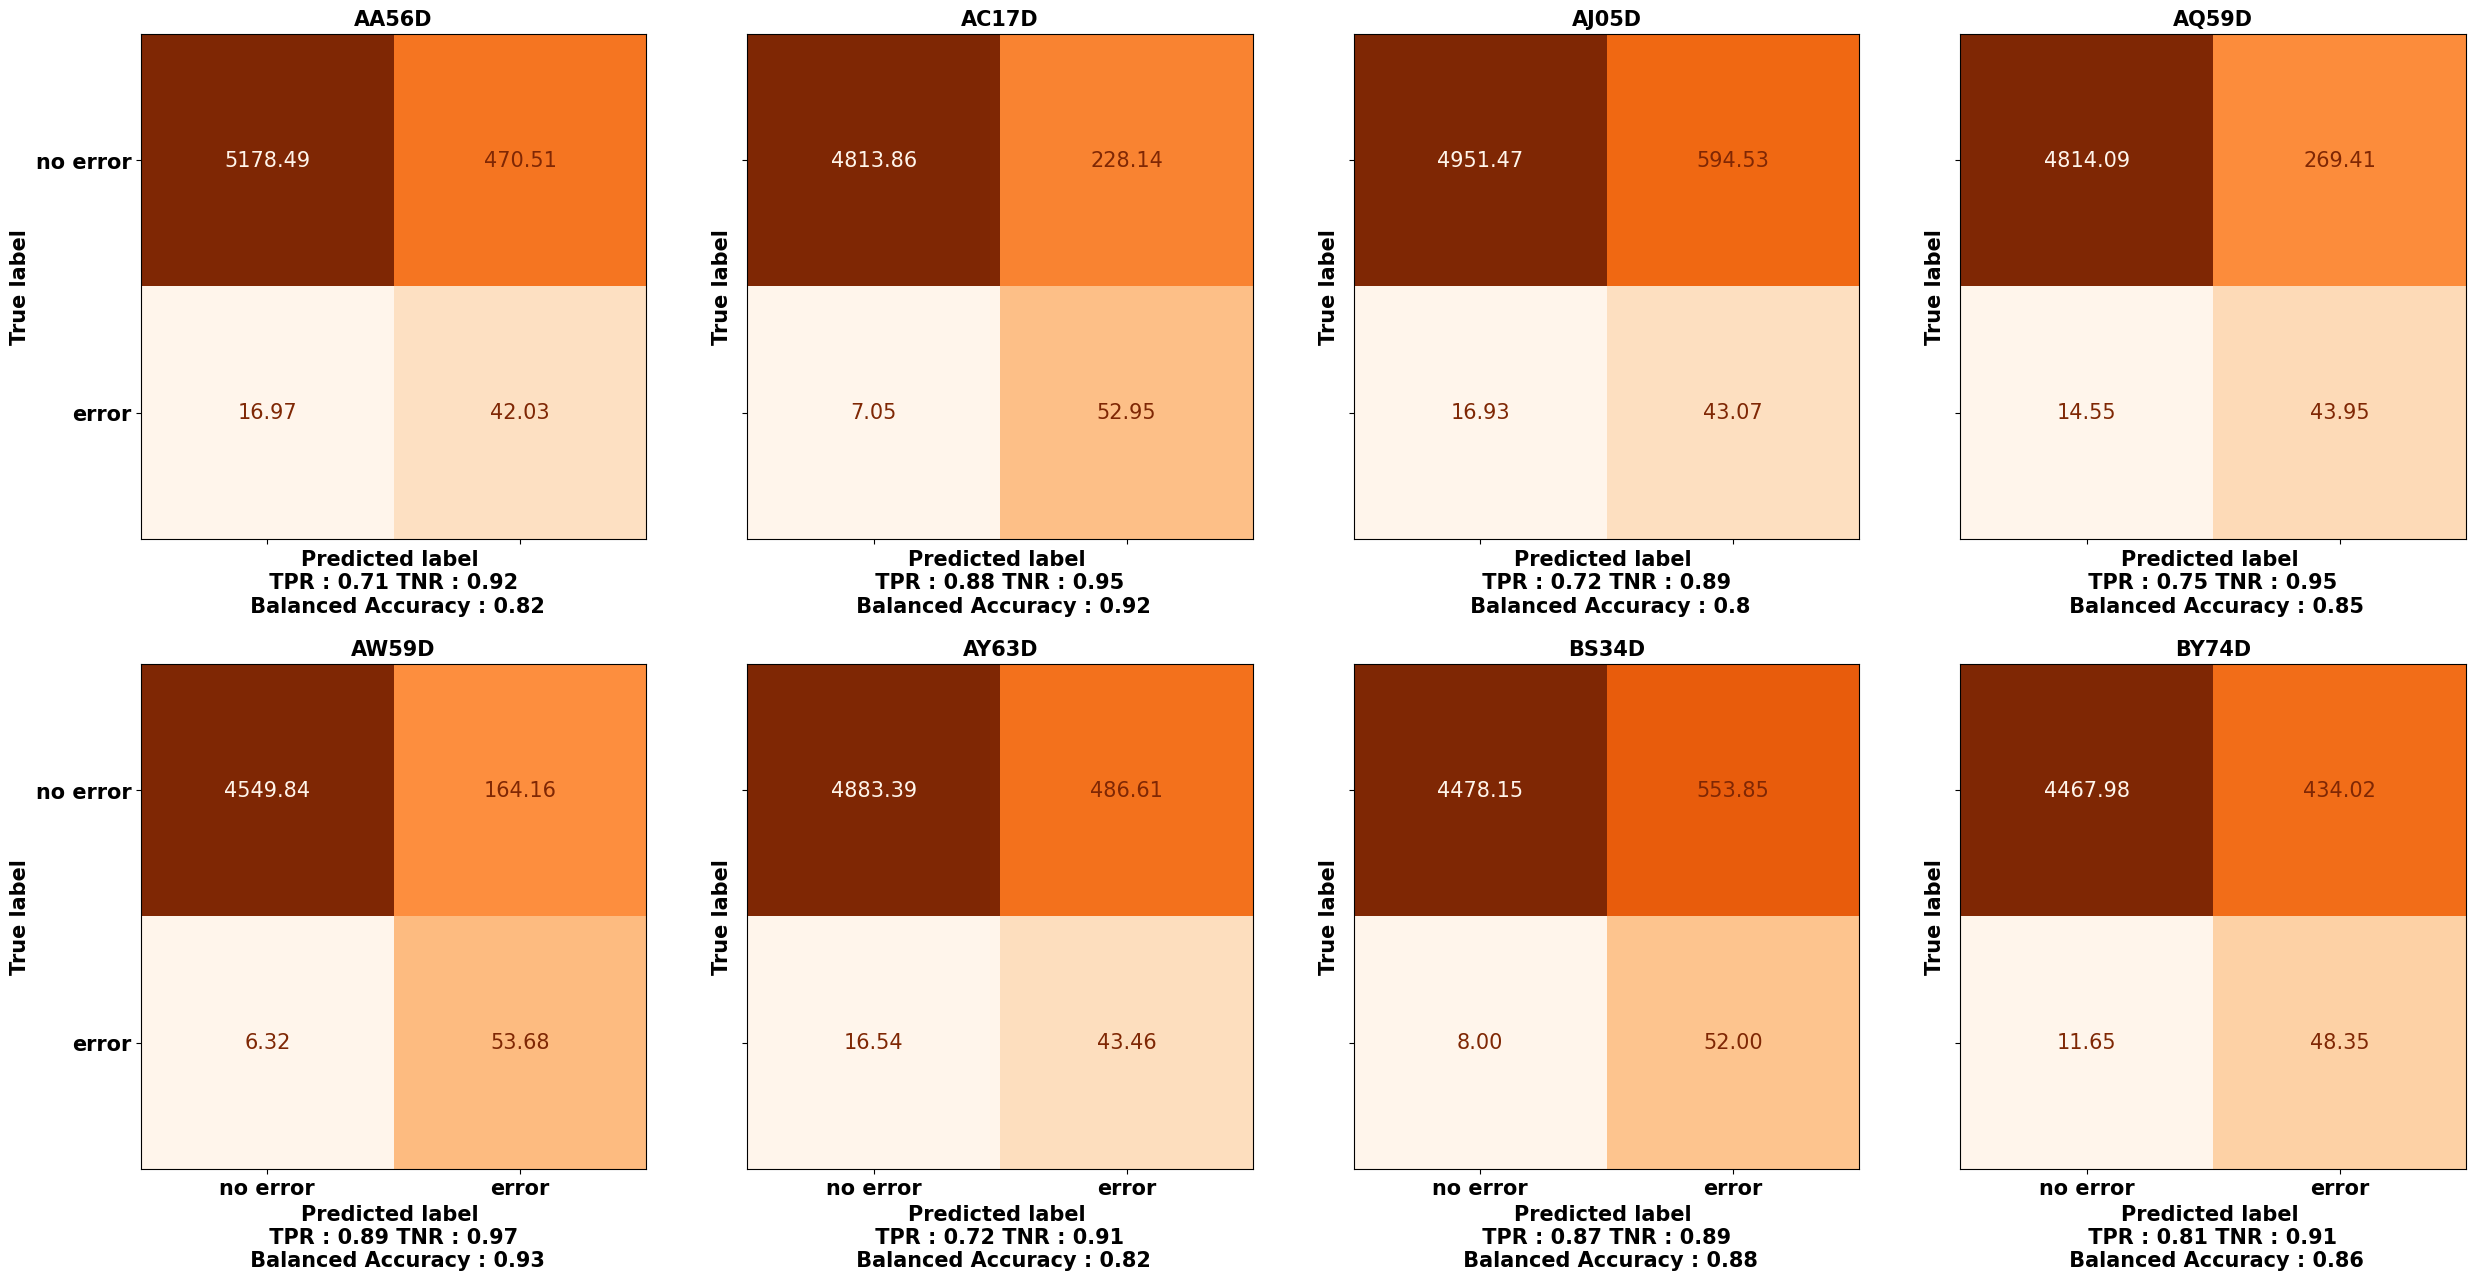

In [6]:

fig, axs = plt.subplots(2, 4, figsize=(30,15), sharex = True)
cmap = 'Oranges'
bold = '\033[1m'

for i, row in enumerate(confusion_df.iterrows()):
    ax=axs[int(i/4), i%4]
    subject, data = row
    
    cm = np.array([[data['tn'], data['fp']],
          [data['fn'], data['tp']]])

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['no error', 'error'])).plot(values_format='.2f', ax=ax, colorbar=False, im_kw={'norm':LogNorm()}, text_kw={'fontsize':15}, cmap=cmap)
    
    ax.set_title(f'{subject}', fontweight='bold', fontsize=15)
    
    ax.set_xlabel(f"Predicted label \n TPR : {data['tpr']} TNR : {data['tnr']} \n Balanced Accuracy : {data['bacc']}", fontweight='bold', fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize=15)
    
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold', fontsize=15)
    
    if i%4!=0:
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=15)
        
    
fig.savefig(f'{datadir}\\confusion_matrix.svg', format='svg')
fig.savefig(f'{datadir}\\confusion_matrix.png', format='png')
plt.show()

# Final predictions on test data

## Loading

In [7]:
fname = 'prediction_32_240623_realwindow_training data_test.csv'

df = pd.read_csv(f'{datadir}\\{fname}')
df['condition'] = df['epoch_in'] + '_' + df['epoch_out']

col_list = ['test_idxs', 'selected_idxs 0', 'selected_idxs 1']
for col in col_list:
    df[col] = df[col].apply(literal_eval)

df.head()

,Unnamed: 0,w_length,w_step,epoch_in,epoch_out,preprocessing_modality,undersample,normalization,Method,test_idxs,selected_idxs 0,selected_idxs 1,subject,trial,condition
0,0,250,50,realwindow_training data,realwindow_test data,preprocessed,True,True,Cov + CSP + TS + SVM,"[5, 6]","[36075, 46036, 55689, 85030, 98599, 115819]","[63393, 79889, 90099, 100588, 116639, 129545]",BY74D,0,realwindow_training data_realwindow_test data
1,1,250,50,realwindow_training data,realwindow_test data,preprocessed,True,True,Cov + CSP + TS + SVM,"[5, 6]","[22898, 38618, 52668, 80687, 110655, 122968]","[44310, 58361, 76681, 97301, 109949, 124565]",AA56D,0,realwindow_training data_realwindow_test data
2,2,250,50,realwindow_training data,realwindow_test data,preprocessed,True,True,Cov + CSP + TS + SVM,"[5, 6]","[24771, 53428, 65716, 86053, 103016, 121110]","[43028, 50743, 59532, 86156, 121305, 126740]",AC17D,0,realwindow_training data_realwindow_test data
3,3,250,50,realwindow_training data,realwindow_test data,preprocessed,True,True,Cov + CSP + TS + SVM,"[5, 6]","[39728, 52550, 59578, 73669, 101720, 129899]","[34690, 62115, 82530, 94314, 110367, 121534]",AJ05D,0,realwindow_training data_realwindow_test data
4,4,250,50,realwindow_training data,realwindow_test data,preprocessed,True,True,Cov + CSP + TS + SVM,"[6, 7]","[31185, 45558, 101309, 110271, 116682, 132537]","[12302, 20705, 32534, 59094, 73556, 119644]",AQ59D,0,realwindow_training data_realwindow_test data


In [8]:
metric = [f'selected_idxs']
l = [f'{m} {i}' for i in range(2) for m in metric]
concat_preds = df.groupby(by='subject')[['test_idxs']+l].sum()
concat_preds['test_idxs'] = concat_preds['test_idxs'].apply(lambda x : list(set(x)))
concat_preds

,test_idxs,selected_idxs 0,selected_idxs 1
subject,,,
AA56D,"[6, 5]","[22898, 38618, 52668, 80687, 110655, 122968, 2...","[44310, 58361, 76681, 97301, 109949, 124565, 4..."
AC17D,"[6, 5]","[24771, 53428, 65716, 86053, 103016, 121110, 2...","[43028, 50743, 59532, 86156, 121305, 126740, 9..."
AJ05D,"[6, 5]","[39728, 52550, 59578, 73669, 101720, 129899, 1...","[34690, 62115, 82530, 94314, 110367, 121534, 3..."
AQ59D,"[6, 7]","[31185, 45558, 101309, 110271, 116682, 132537,...","[12302, 20705, 32534, 59094, 73556, 119644, 20..."
AW59D,"[6, 5]","[16166, 28509, 53695, 82479, 95132, 104986, 16...","[65078, 80220, 90004, 99578, 108166, 116035, 8..."
AY63D,"[6, 5]","[6259, 44811, 60310, 81494, 104840, 132576, 30...","[2125, 48413, 68807, 89114, 106391, 123696, 63..."
BS34D,"[6, 5]","[40133, 50415, 67382, 94475, 102728, 120877, 4...","[32915, 50067, 70186, 83531, 93728, 100533, 39..."
BY74D,"[6, 5]","[36075, 46036, 55689, 85030, 98599, 115819, 36...","[63393, 79889, 90099, 100588, 116639, 129545, ..."


In [9]:
concat_preds.iloc[:,1:].apply(lambda x : x.apply(len))

,selected_idxs 0,selected_idxs 1
subject,,
AA56D,60,60
AC17D,60,60
AJ05D,60,60
AQ59D,60,60
AW59D,60,60
AY63D,60,60
BS34D,60,60
BY74D,60,60


## Short

In [10]:
serie_list = []
for i, subject in enumerate(concat_preds.index):
    # print(subject)
    for j in range(2):
        # print(f"{subject} run {concat_preds['test_idxs'][subject][j]}")
        data = concat_preds[[f'{m} {j}' for m in metric]].loc[subject]
        counts = data.apply(lambda x : pd.Series(x).value_counts())
        counts = counts.T.sort_values(by=[f'{metric[k]} {j}' for k in range(len(metric))], ascending=False).T
        
        serie_list.append(pd.Series({'subject':subject, 'run':concat_preds['test_idxs'][subject][j], 'sample':counts.columns[:6].sort_values().values}))
        
sample_df = pd.DataFrame(serie_list)
sample_df

,subject,run,sample
0,AA56D,6,"[22898, 38618, 52668, 65100, 80687, 105767]"
1,AA56D,5,"[45922, 58361, 76681, 97301, 109949, 124565]"
2,AC17D,6,"[24771, 45009, 65716, 86053, 106129, 121108]"
3,AC17D,5,"[43028, 50743, 59532, 86156, 116132, 124529]"
4,AJ05D,6,"[39728, 59577, 59578, 73669, 121492, 129899]"
5,AJ05D,5,"[34691, 58134, 72881, 83627, 121534, 134377]"
6,AQ59D,6,"[31185, 45557, 95164, 105995, 116682, 132537]"
7,AQ59D,7,"[15209, 20705, 35082, 58854, 73555, 119644]"
8,AW59D,6,"[16166, 28509, 53695, 82479, 95132, 104986]"
9,AW59D,5,"[80356, 90004, 99578, 108166, 108314, 116035]"


In [11]:
print(sample_df.to_latex(index=False, caption='Sample indices of error detected per subject per run', label='table:sample_preds'))

\begin{table}
\centering
\caption{Sample indices of error detected per subject per run}
\label{table:sample_preds}
\begin{tabular}{lll}
\toprule
subject & run &                                        sample \\
\midrule
  AA56D &   6 &   [22898, 38618, 52668, 65100, 80687, 105767] \\
  AA56D &   5 &  [45922, 58361, 76681, 97301, 109949, 124565] \\
  AC17D &   6 &  [24771, 45009, 65716, 86053, 106129, 121108] \\
  AC17D &   5 &  [43028, 50743, 59532, 86156, 116132, 124529] \\
  AJ05D &   6 &  [39728, 59577, 59578, 73669, 121492, 129899] \\
  AJ05D &   5 &  [34691, 58134, 72881, 83627, 121534, 134377] \\
  AQ59D &   6 & [31185, 45557, 95164, 105995, 116682, 132537] \\
  AQ59D &   7 &   [15209, 20705, 35082, 58854, 73555, 119644] \\
  AW59D &   6 &   [16166, 28509, 53695, 82479, 95132, 104986] \\
  AW59D &   5 & [80356, 90004, 99578, 108166, 108314, 116035] \\
  AY63D &   6 & [30978, 44811, 76371, 101424, 116300, 132576] \\
  AY63D &   5 &   [6355, 68807, 69857, 89114, 106391, 123696] \\
 

C:\Users\ma.rihet\AppData\Local\Temp\ipykernel_15548\694631250.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sample_df.to_latex(index=False, caption='Sample indices of error detected per subject per run', label='table:sample_preds'))


In [12]:
os.makedirs(f'{datadir}\\test_results_ChocolaTeam', exist_ok = True)
today = datetime.datetime.now().strftime("%Y%m%d")
for idx, row in sample_df.iterrows():
    samples = row['sample']
    run = row['run']
    subject = row['subject']
    with open (f'{datadir}\\test_results_ChocolaTeam\\{today}_{subject}_orthosisErrorIjcai_multi_set{run}_results.txt', 'w') as f:
        f.write(', '.join([str(elem) for elem in samples]))

## Global

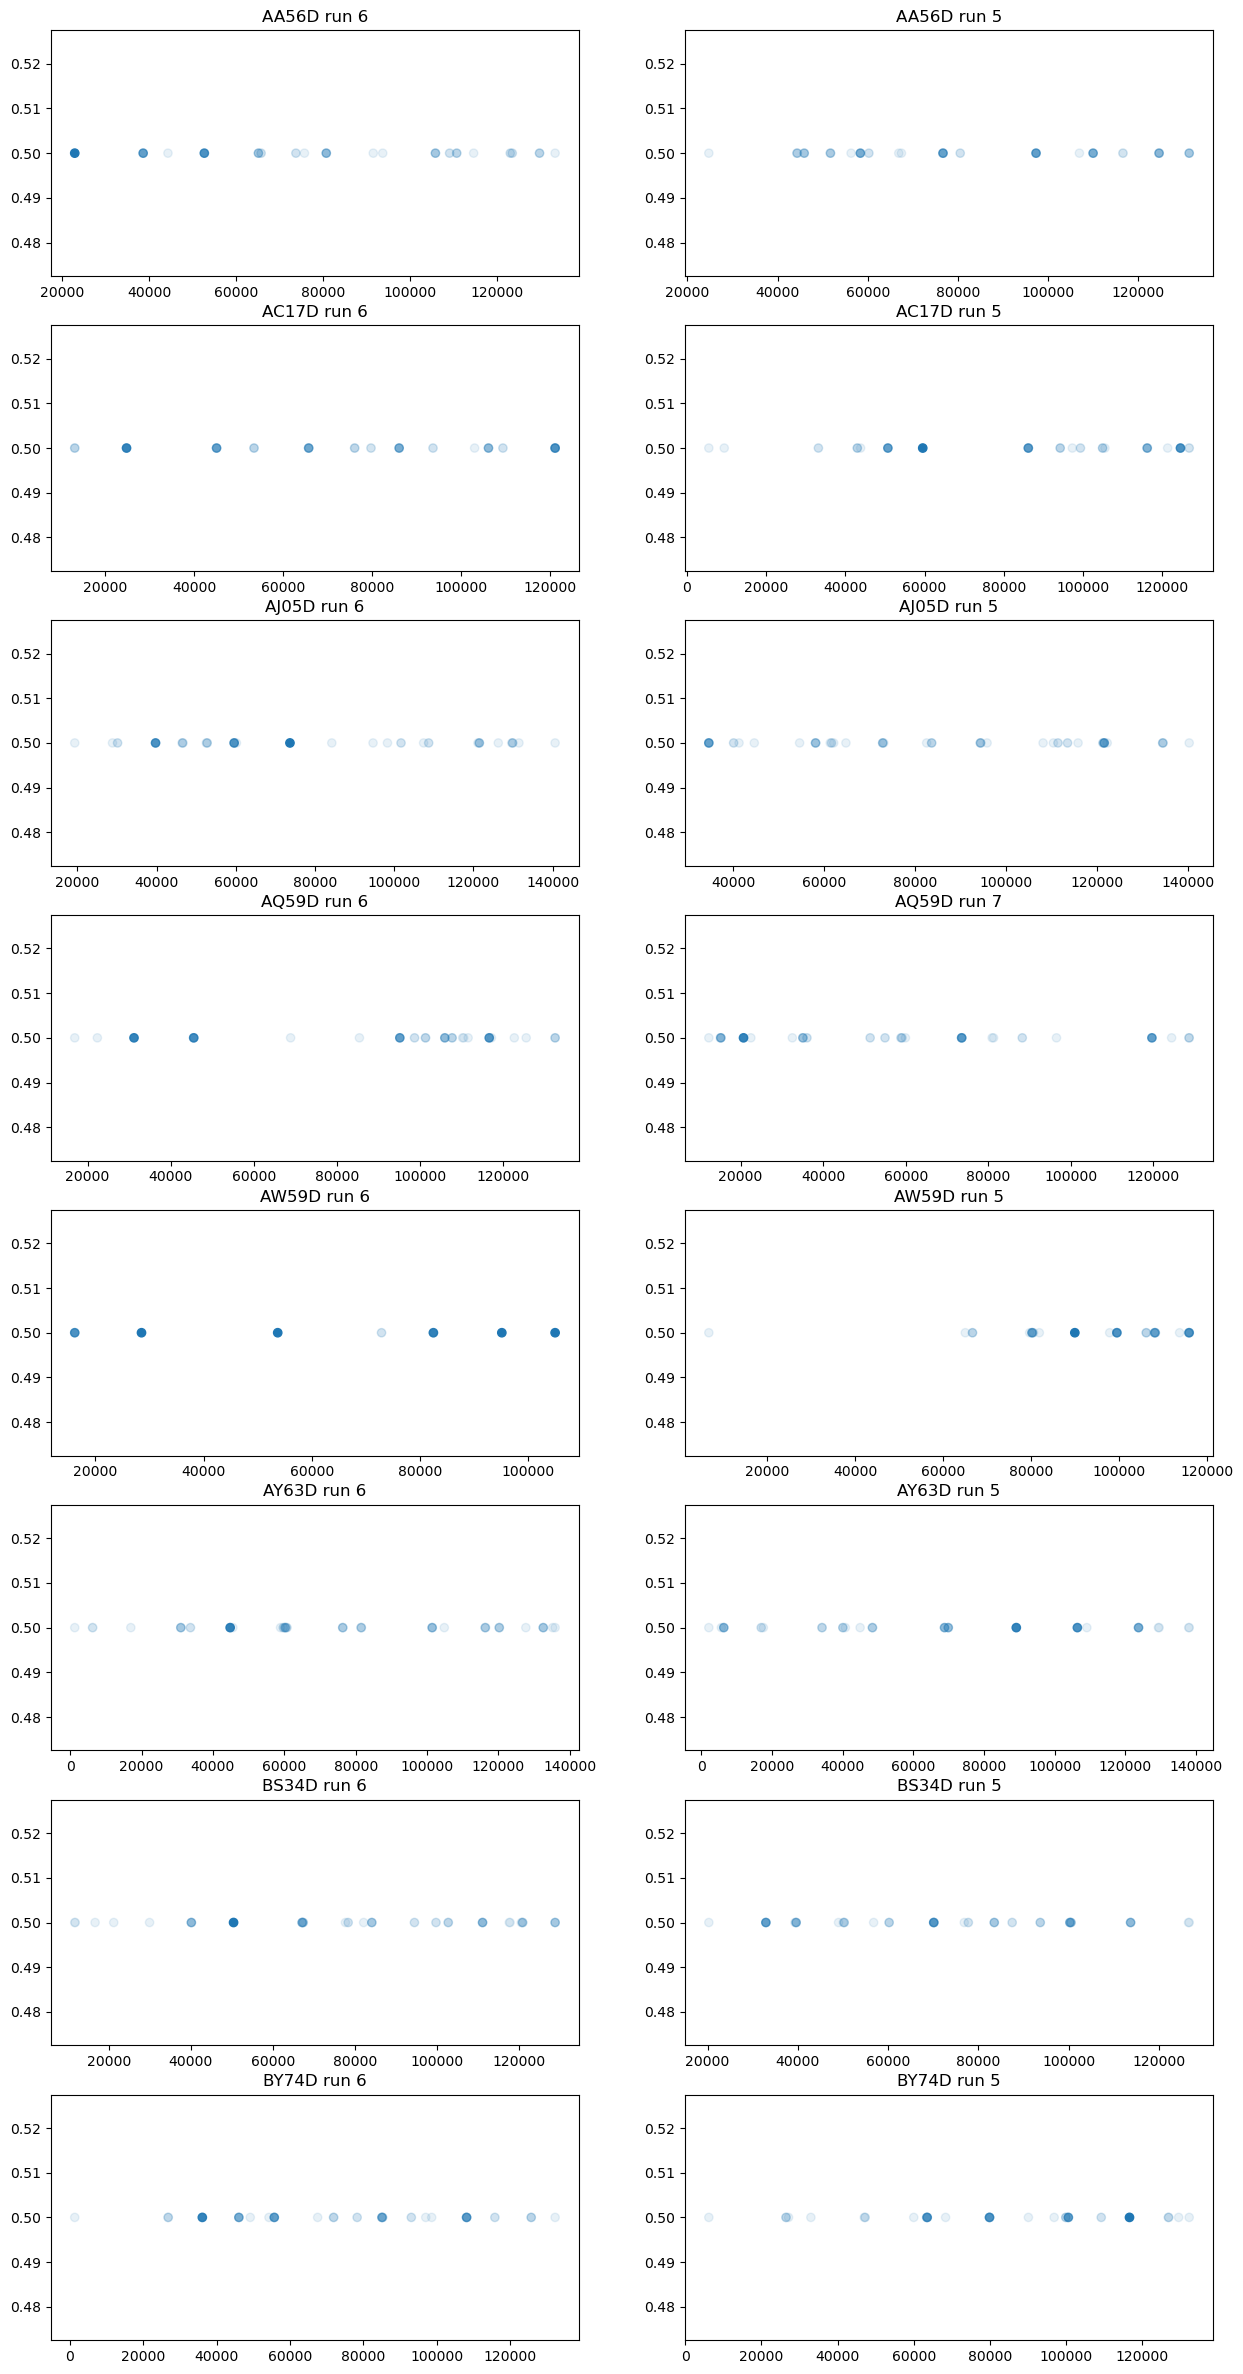

In [13]:
fig, axs=plt.subplots(8, 2,  figsize = (15,30))
for i, subject in enumerate(concat_preds.index):
    for j in range(2):
        axs[i,j].set_title(f"{subject} run {concat_preds['test_idxs'][subject][j]}")
        for k, m in enumerate(metric):
            preds = concat_preds[f'{m} {j}'][subject]
            counts = pd.Series(preds).value_counts()
            # display(counts)
    
            axs[i,j].scatter(counts.index, [(k+1)/2]*len(counts), alpha=.1*counts.values)
        

plt.show()    

## Detailled

AA56D
AA56D run 6


,22898,52668,38618,80687,65100,105767,110655,129686,73712,109026,...,123439,91483,65715,65714,93660,44313,133266,75674,123381,114549
selected_idxs 0,10,8,7,5,4,4,3,3,2,2,...,1,1,1,1,1,1,1,1,1,1


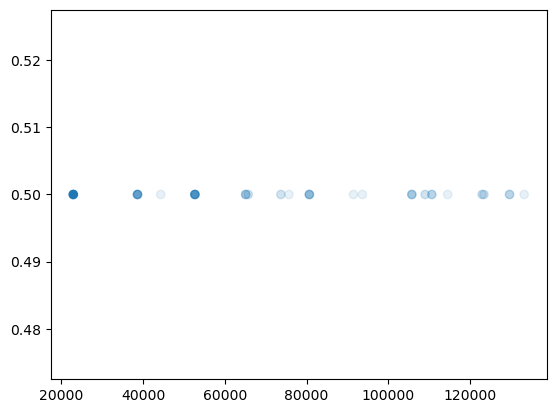

AA56D run 5


,97301,109949,58361,76681,124565,45922,131249,51749,80499,60250,...,66876,51677,116567,116568,76679,76682,124600,24780,67470,106914
selected_idxs 1,7,6,6,6,4,4,4,3,2,2,...,1,1,1,1,1,1,1,1,1,1


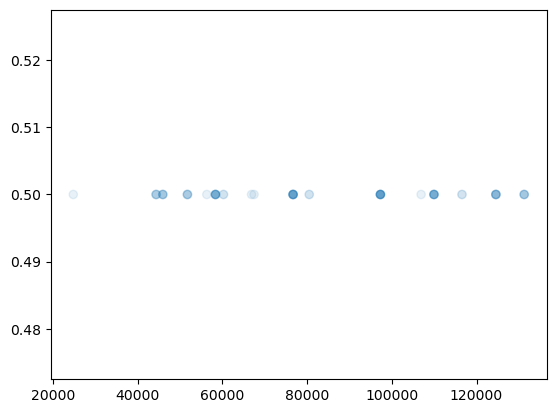

AC17D
AC17D run 6


,24771,121108,45009,86053,65716,106129,53428,13129,121110,76052,93662,109377,103016,76051,65715,79724,79722
selected_idxs 0,9,7,7,6,6,5,3,3,3,2,2,2,1,1,1,1,1


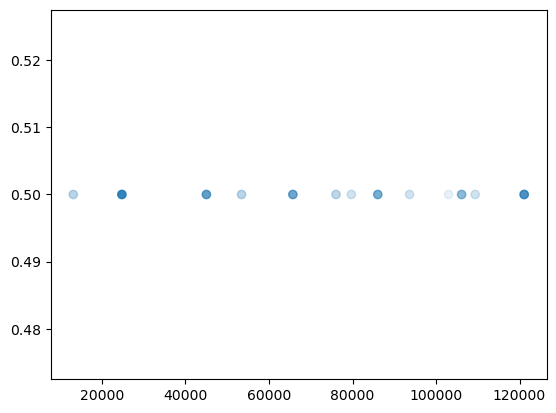

AC17D run 5


,59532,124529,86156,50743,116132,43028,94203,104899,99309,33214,5580,116227,86157,43855,105486,121305,126740,9468,126739,97268
selected_idxs 1,10,8,7,7,5,3,3,3,2,2,1,1,1,1,1,1,1,1,1,1


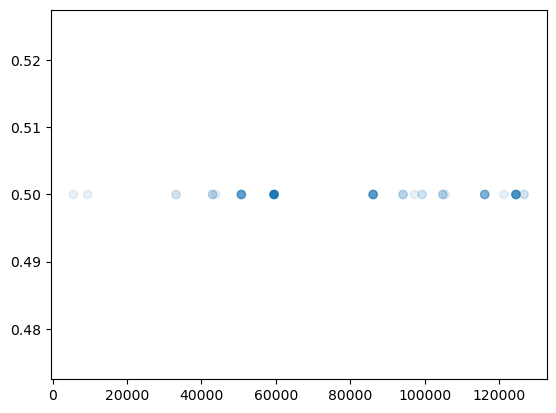

AJ05D
AJ05D run 6


,73669,39728,59578,121492,129899,59577,101720,46475,46623,108700,...,52550,107427,126285,121143,84238,28856,52747,98296,129687,60140
selected_idxs 0,10,8,7,4,3,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


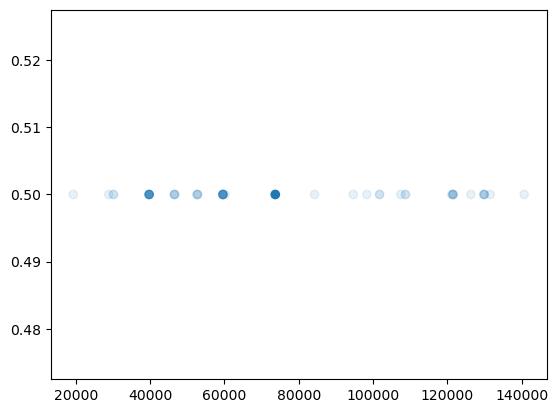

AJ05D run 5


,121534,34691,72881,134377,58134,83627,111370,121249,113473,34690,...,134478,115787,94314,95806,44673,82530,61350,73114,110367,64800
selected_idxs 1,6,6,4,3,3,3,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


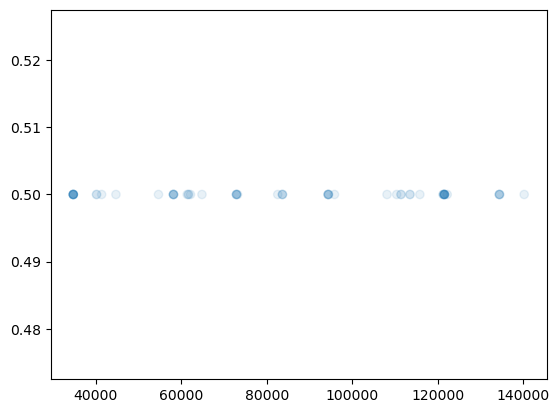

AQ59D
AQ59D run 6


,31185,45557,116682,95164,105995,132537,107745,98708,45558,101358,...,111599,117208,110271,116720,16922,22367,122719,85438,68877,125577
selected_idxs 0,9,8,7,7,5,3,3,2,2,2,...,1,1,1,1,1,1,1,1,1,1


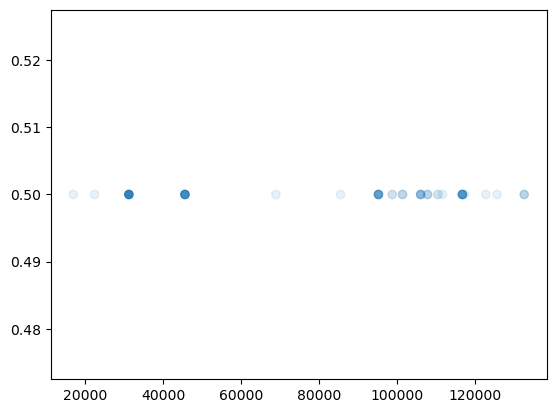

AQ59D run 7


,20705,119644,73555,15209,35082,58854,73556,35113,51383,59094,...,22486,59930,12302,15048,80935,128676,96520,81284,32534,128638
selected_idxs 1,9,7,6,5,3,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


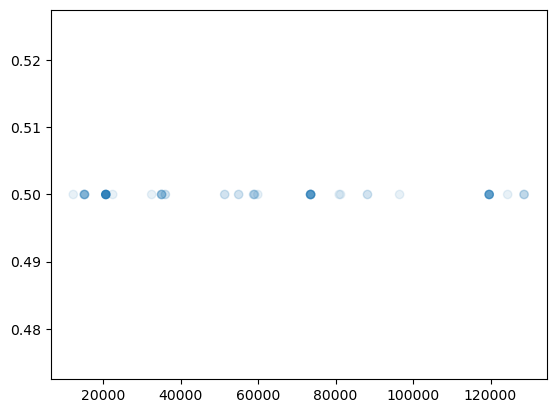

AW59D
AW59D run 6


,28509,53695,95132,104986,82479,16166,72889,82478
selected_idxs 0,10,10,10,10,9,8,2,1


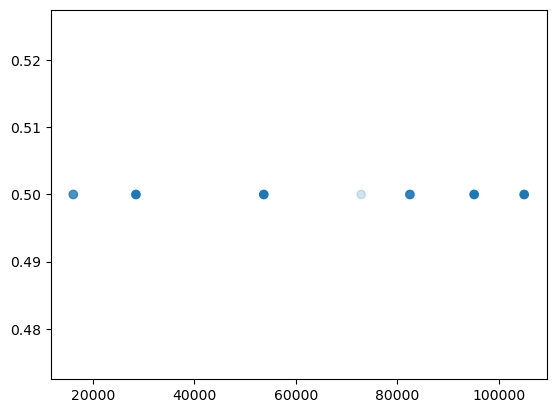

AW59D run 5


,90004,116035,99578,108166,80356,108314,80220,106258,66711,99577,115914,115957,79724,81925,65078,6709,113847,97936,80613
selected_idxs 1,10,7,7,5,4,4,4,3,3,3,2,1,1,1,1,1,1,1,1


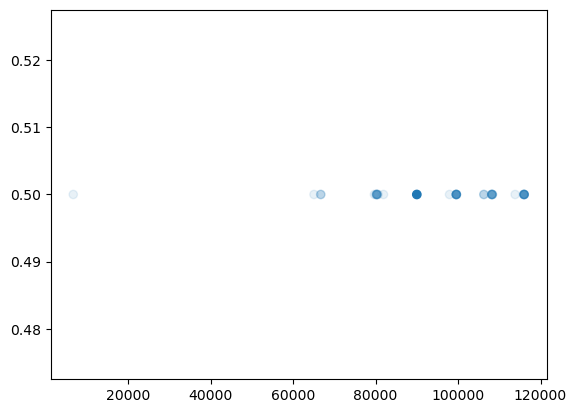

AY63D
AY63D run 6


,44811,30978,101424,132576,76371,116300,120250,60310,59697,33681,...,60417,6259,120214,16967,60250,6260,1249,81607,135900,76374
selected_idxs 0,9,4,4,4,3,3,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


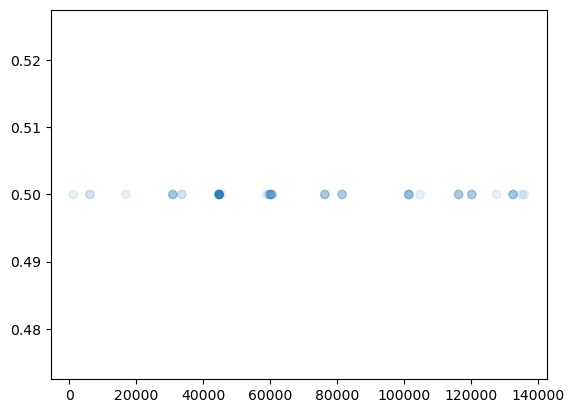

AY63D run 5


,89114,106391,123696,68807,6355,69857,40049,48412,16947,48413,...,44928,129513,137908,2125,69897,138036,109070,17544,129328,5675
selected_idxs 1,9,8,6,5,5,4,3,2,2,2,...,1,1,1,1,1,1,1,1,1,1


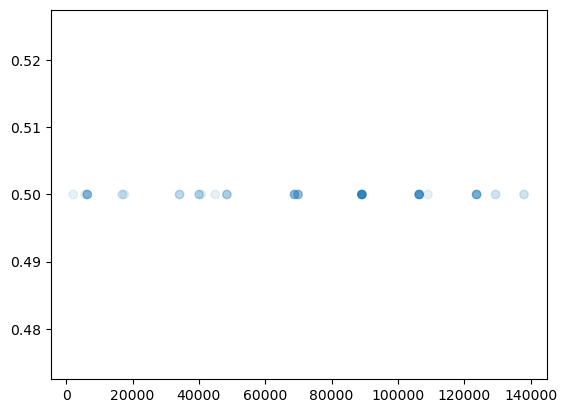

BS34D
BS34D run 6


,50415,111066,40133,67127,84092,128742,120792,67382,67128,99725,...,11833,117767,102683,16687,21223,117583,82100,11729,120877,29953
selected_idxs 0,10,5,5,4,4,4,3,3,2,2,...,1,1,1,1,1,1,1,1,1,1


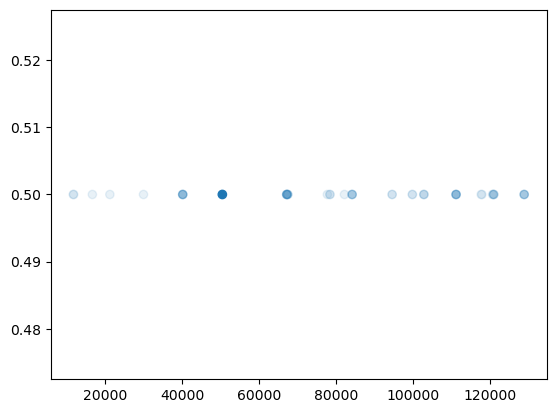

BS34D run 5


,32915,70110,39619,100290,113748,100533,83531,50267,93728,60233,...,50067,49018,126586,126738,56796,20271,39356,76887,77781,87499
selected_idxs 1,7,7,5,5,5,4,4,3,3,3,...,1,1,1,1,1,1,1,1,1,1


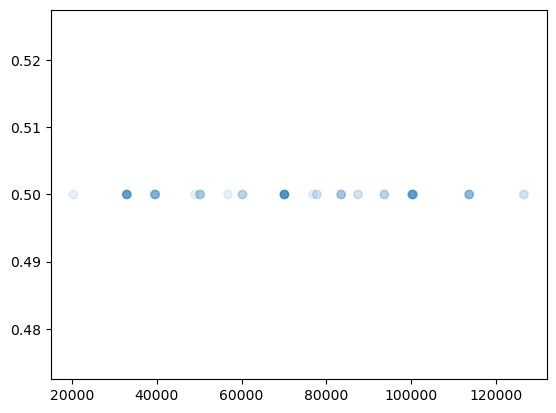

BY74D
BY74D run 6


,36075,108113,55689,46036,85030,125727,85199,71882,26787,78279,...,26735,108099,132240,96970,67511,49142,1299,71831,98599,54246
selected_idxs 0,9,7,7,6,5,3,3,2,2,2,...,1,1,1,1,1,1,1,1,1,1


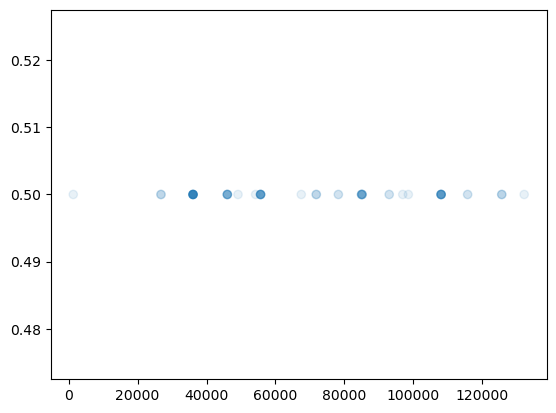

BY74D run 5


,116639,79889,63536,100588,63393,79888,126913,99922,26468,47223,...,90099,68357,99921,32991,132315,129545,126830,96858,27116,47009
selected_idxs 1,10,7,7,7,3,3,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


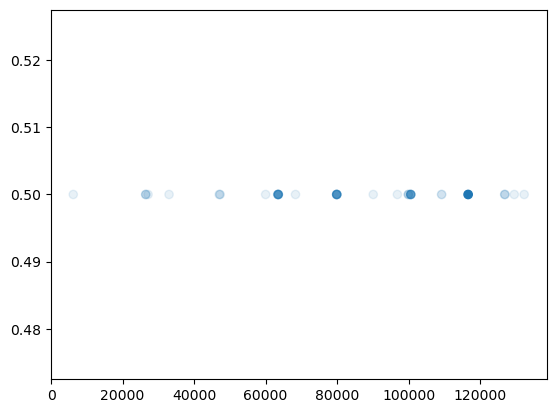

In [14]:
for i, subject in enumerate(concat_preds.index):
    print(subject)
    for j in range(2):
        print(f"{subject} run {concat_preds['test_idxs'][subject][j]}")
        data = concat_preds[[f'{m} {j}' for m in metric]].loc[subject]
        counts = data.apply(lambda x : pd.Series(x).value_counts())
        counts = counts.T.sort_values(by=[f'{metric[k]} {j}' for k in range(len(metric))], ascending=False).T
        display(counts)

        for l in range(len(metric)):
            subcounts = counts.iloc[l].dropna()
            plt.scatter(subcounts.index, [(l+1)/2]*len(subcounts), alpha=.1*subcounts.values)
        
        plt.show()